In [35]:
import pandas as pd
import matplotlib.pyplot as plt

path = 'database.csv'

data= pd.read_csv(path, index_col=0)
print(data.head())

            id_marca  vendas  valor_do_veiculo nome_veiculo       marca
data                                                                   
2022-01-01         1      40             29000         Mobi        Fiat
2022-01-01         1       2             49000         argo        Fiat
2022-01-01         1       3             19000          Uno        Fiat
2022-01-01         2      35             35000           Up  Volkswagen
2022-01-01         3      42             32000      Picanto         Kia


A marca com o maior volume de vendas é: Fiat


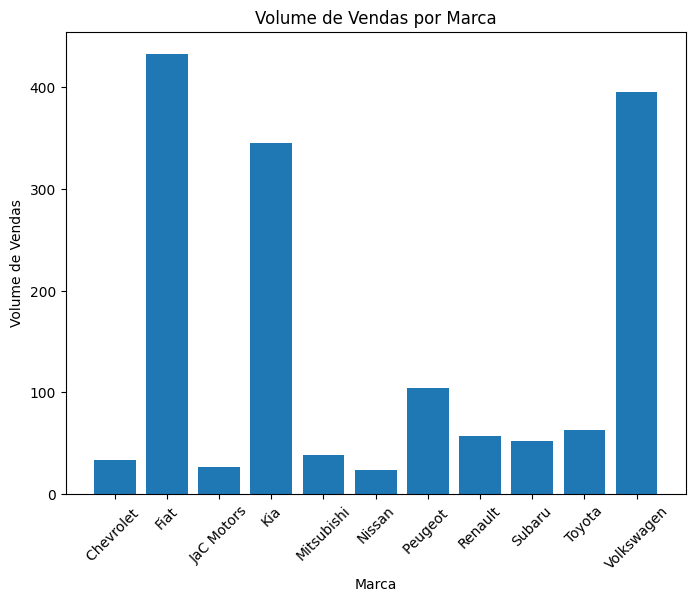

In [37]:
# Qual marca teve o maior volume de vendas?
biggestVol = data.groupby('marca')['vendas'].sum().idxmax()

print(f"A marca com o maior volume de vendas é: {biggestVol}")

plt.figure(figsize=(8, 6))
plt.bar(dados_veiculos.groupby('marca')['vendas'].sum().index, dados_veiculos.groupby('marca')['vendas'].sum())
plt.title('Volume de Vendas por Marca')
plt.xlabel('Marca')
plt.ylabel('Volume de Vendas')
plt.xticks(rotation=45)
plt.show()


O veículo que gerou a maior receita é: Mobi
O veículo que gerou a menor receita é: Palio


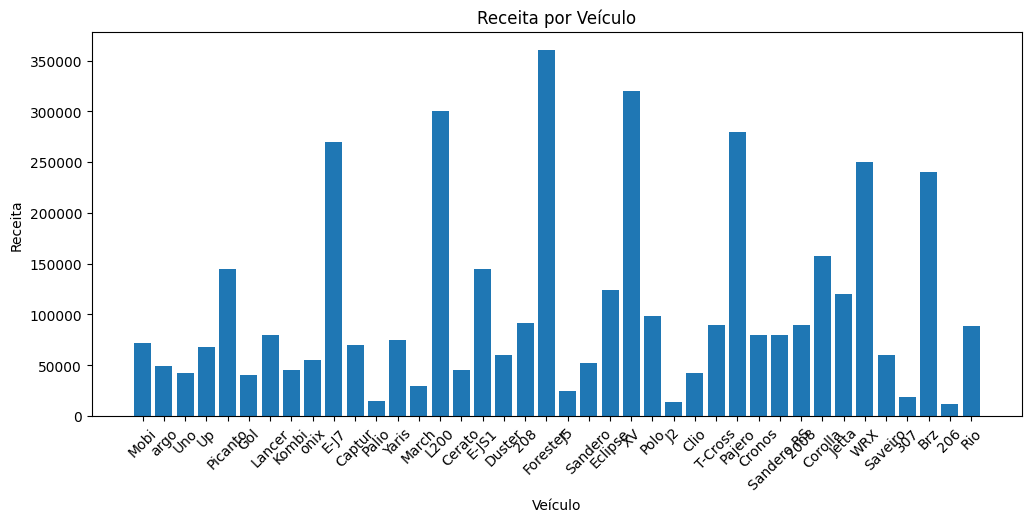

In [43]:
#Qual veículo gerou a maior e menor receita?
biggestReceipt = data.loc[data['valor_do_veiculo'].idxmax(), 'nome_veiculo']
lowerReceipt = data.loc[data['valor_do_veiculo'].idxmin(), 'nome_veiculo']

biggestReceipt = biggestReceipt.iloc[0]
lowerReceipt = lowerReceipt.iloc[0]

print(f"O veículo que gerou a maior receita é: {biggestReceipt}")
print(f"O veículo que gerou a menor receita é: {lowerReceipt}")


plt.figure(figsize=(12, 8))
plt.bar(data['nome_veiculo'], data['valor_do_veiculo'])
plt.title('Receita por Veículo')
plt.xlabel('Veículo')
plt.ylabel('Receita')
plt.xticks(rotation=45)
plt.subplots_adjust(bottom=0.4)  # Ajuste este valor conforme necessário para dar mais espaço à legenda
plt.show()

A média de vendas do ano por marca é:          marca  data     vendas
0   Chevrolet   2022   3.666667
1         Fiat  2022  19.681818
2   JaC Motors  2022   2.166667
3          Kia  2022  23.000000
4   Mitsubishi  2022   3.800000
5       Nissan  2022   3.285714
6     Peugeot   2022  11.555556
7      Renault  2022   4.750000
8       Subaru  2022   7.428571
9       Toyota  2022   7.875000
10  Volkswagen  2022  18.809524


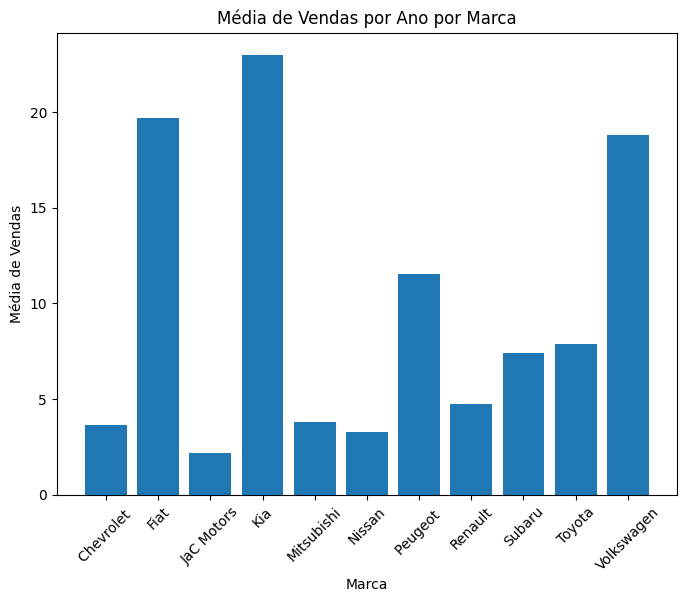

In [44]:
#Qual a média de vendas do ano por marca?
data.index = pd.to_datetime(data.index)

mediaSales = data.groupby(['marca', data.index.year])['vendas'].mean()
mediaSales = mediaSales.reset_index()

print(f"A média de vendas do ano por marca é: {mediaSales}")

plt.figure(figsize=(8, 6))
plt.bar(mediaSales['marca'], mediaSales['vendas'])
plt.title('Média de Vendas por Ano por Marca')
plt.xlabel('Marca')
plt.ylabel('Média de Vendas')
plt.xticks(rotation=45)
plt.show()


As marcas que geraram uma receita maior com número menor de vendas foram:marca
Chevrolet      40000.0
Fiat               NaN
JaC Motors    270000.0
Kia                NaN
Mitsubishi     75000.0
Nissan         22000.0
Peugeot        19000.0
Renault        30000.0
Subaru        300000.0
Toyota         60000.0
Volkswagen         NaN
dtype: float64


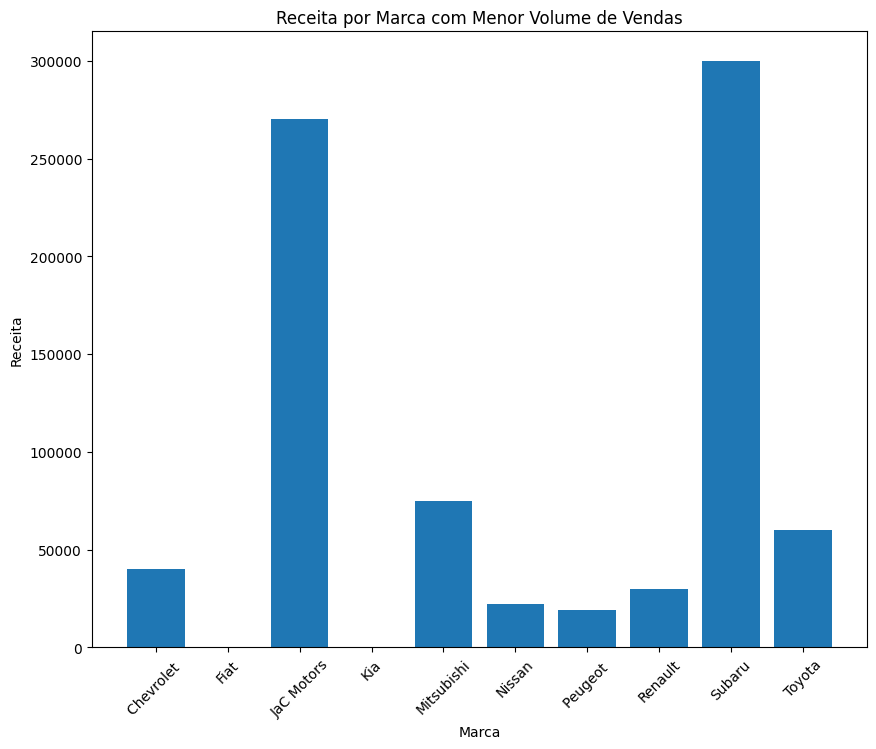

In [50]:
#Quais marcas geraram uma receita maior com número menor de vendas?
data['valor_do_veiculo'] = pd.to_numeric(data['valor_do_veiculo'], errors='coerce')

brandBiggestReceipt = data.groupby('marca').apply(lambda x: x.loc[x['vendas'].idxmin()]['valor_do_veiculo'])
brandBiggestReceipt = pd.to_numeric(brandBiggestReceipt, errors='coerce')

print(f"As marcas que geraram uma receita maior com número menor de vendas foram:{brandBiggestReceipt}")

plt.figure(figsize=(10, 8))
plt.bar(brandBiggestReceipt.index, brandBiggestReceipt)
plt.title('Receita por Marca com Menor Volume de Vendas')
plt.xlabel('Marca')
plt.ylabel('Receita')
plt.xticks(rotation=45)
plt.show()


A relação entre veículos mais vendidos: nome_veiculo
Mobi       414
Up         373
Picanto    338
208         90
Corolla     40
Name: vendas, dtype: int64


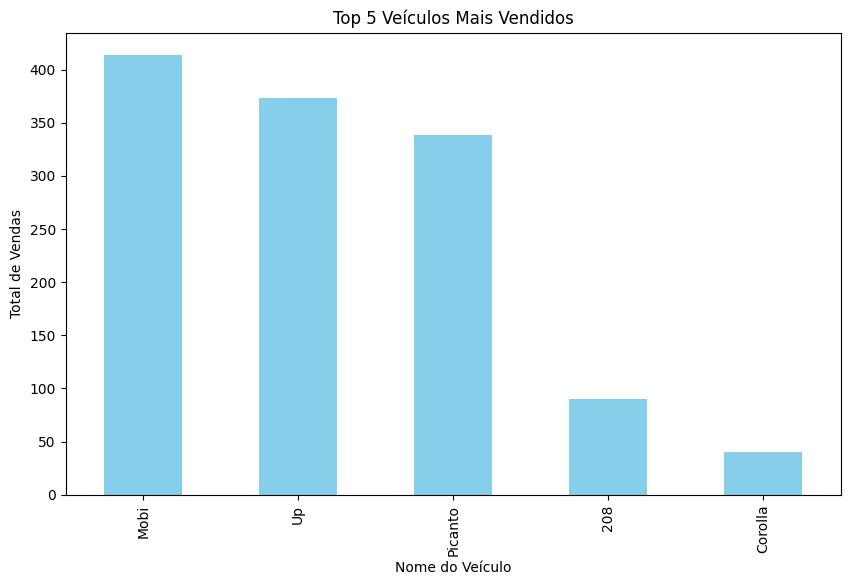

In [51]:
#Existe alguma relação entre os veículos mais vendidos?

mostSale = data.groupby('nome_veiculo')['vendas'].sum().sort_values(ascending=False).head(5)
print(f"A relação entre veículos mais vendidos: {mostSale}")

plt.figure(figsize=(10, 6))
mostSale.plot(kind='bar', color='skyblue')
plt.title('Top 5 Veículos Mais Vendidos')
plt.xlabel('Nome do Veículo')
plt.ylabel('Total de Vendas')
plt.show()